# Integración y Derivación Básica

La evaluación numérica de integrales es un concepto central en las ciencias. A pesar de que usualmente buscamos soluciones análiticas para obtener expresiones cerradas con técnicas sofisticadas (e.g., valores principales, extensión analítica), es usualmente muy complicado o incluso *imposible* encontrar estas soluciones para una gran gama de problemas.

En esta clase, vamos a estudiar distintas técnicas para evaluar integrales de forma numérica. Note que las integrales se pueden ver en algunos casos como la solución a una ecuación diferencial, de manera tal que podemos usar estas técnicas para evaluar derivadas. Sin embargo, para soluciones de ecuaciones diferenciales veremos otras técnicas de integración más adelante.

## Conceptos fundamentales

La idea básica corresponde a:

* Pensar las integrales como áreas bajo una curva
* Aproximar estas áreas usando formas básicas (rectángulos, trapezoides, rectángulos con punto alto polinomial...)

La forma más básica corresponde a utilizar rectángulos. El procedimiento que se conoce como sumas de Riemann:
\begin{equation}
I(a, b) = \int_{a}^{b} {\rm{d}}x f(x) \approx \sum_{k=1}^{N} f(x_k) h,
\end{equation}
done $h$ corresponde al ancho del rectángulo y $f(x_k)$ es la función a integrar evaluada en el punto $x_k$, con dominio de $x$ discretizado en una grilla unidimensional, tal que $N$ corresponde al número de "pasos" que satisface $b = a + (N * h)$.

![](Fig1.png)

## Regla de trapezoides

<div>
<img src="Fig2.png" width="350"/>
</div>

Para aplicar la regla de trapezoides:

* Dividimos el intervalo en $N$ subregiones
* La función se aproxima con segmentos en cada subregión

De esta forma, tenemos $N$ subregiones de ancho
\begin{equation}
h = \frac{b - a}{N}
\end{equation}

El área del trapezoide con índice k está dada por (rectángulo + triángulo)
\begin{align}
A_k &= hf(x_k) + \frac{h [f(x_k + h) - f(x_k)]}{2} \\
&= \frac{h [f(x_k + h) + f(x_k)]}{2}
\end{align}

De esta manera, podemos aproximar la integral por la suma total de los trapezios. Definiendo $x_k = a + kh$, tenemos
\begin{align}
\boxed{I(a, b) \approx h\left[\frac12 f(a) + \frac12f(b) + \sum_{k=1}^{N-1} f(a+kh)\right]}.
\end{align}

Note la similitud con la suma de Riemann, con la excepción de los puntos finales e iniciales. A pesar de esto, la diferencia en la aproximación es significante!

## Regla de Simpson

<div>
<img src="Fig3.png" width="350"/>
</div>

La regla de Simpson es similar a la anterior, con la excepción de que entre cada punto $x_k$ y $x_{k+1}$, la función no se aproxima con una línea recta como en la regla de trapezoides, si no con una función cuadrática.

Puntos importantes al aplicar la regla de Simpson:

* De la misma forma, subdividimos la región en $N$ subregiones. 
    - $N$ debe ser un número par! Si no es par, se descarta un elemento de la región de integración o se utiliza la regla de trapezoides para el último punto.
* La función de integración se aproxima con una función **cuadrática** por cada dos elementos de la subregión.
* Se necesitan dos elementos porque se requiren tres puntos para definir la función cuadrática
* Igual que con toda la metología de esta clase, más elementos $\implies$ mejor aproximación.
* La idea es que con esta aproximación de orden mayor, se obtiene una mejor aproximación con menos elementos de integración.

Utilizando la misma notación que utilizamos anteriormente, el área de cada **dos segmentos con la función aproximada de manera cuadrática** está dada por
\begin{align}
A_k = \frac{h}3\left\{f[a+(2k-2)h] + 4f[a+(2k-1)h] + f(a+2kh)\right\}.
\end{align}
De manera tal que, al sumar todos los segmentos obtenemos
\begin{align}
\boxed{I(a,b) \approx \frac{h}3\left[f(a) + f(b) + 4\sum_{\substack{k\ impar\\ 1\dots{}N-1}}f(a+kh) + 2\sum_{\substack{k\ par \\ 2\dots{}N-2}}f(a+kh)\right].}
\end{align}

* En Python, se puede sumar fácilmente utilizando solamente números pares e impares, con la siguiente sintaxis:
    - `for k in range(1, N, 2)` para los términos impares y
    - `for k in range(2, N, 2)` para los términos pares.

## Fórmulas de Newton-Cotes

La regla de Simpson y de trapezoides pertenecen a una clase más general de reglas de integración:

* Subdividir la región de integración en $N$ subintervalos
* Aproximar la función con un polinomio, el orden de la aproximación es tal que:
    - Orden 0: Suma de Riemann
    - Orden 1: Regla de trapezoides
    - Order 2: Regla de Simpson

Esta clase de métodos da lugar a las fórmulas de Newton-Cotes.
Todas las fórmulas de Newton-Cotes puede ser escritas de la forma
\begin{align}
\int_a^b {\rm{d}}x f(x) \approx \sum_{k=1}^{N+1} w_k f(x_k).
\end{align}
donde:
  * $w_k$ son los "pesos"
  * $x_k$ son los puntos de muestreo. Nótese que usamos $N+1$ puntos (es decir, $N$ subregiones o subintervalos)
  * Para las fórmulas de Newton-Cotes, los puntos de muestreo son **equidistantes**.

## Generalización

Orden | Polinomio | Coeficientes |
:---: | :---: | :---: |
1 | Línea | $\frac{1}{2}, 1, 1,\dots, 1, \frac{1}{2}$ |
2 | Parábola | $\frac13, \frac43, \frac23, \frac43,\dots, \frac23, \frac43, \frac13$ |
3 | Cúbico | $\frac38, \frac98, \frac98, \frac34, \frac98, \frac98, \frac34, \dots, \frac98, \frac 38$ |
4 | Cuártico | $\frac{14}{45}, \frac{64}{45}, \frac{8}{15}, \frac{64}{45}, \frac{28}{45}, \frac{64}{45},\dots,\frac{64}{45}, \frac{14}{45}$ |

## Estimación de errores

Uno de los temas más importantes de los métodos numéricos corresponde a estudiar y analizar los errores en los que incurrimos utilizando metodología numérica

* Por ejemplo, si utilizamos la regla de trapezoides con un valor fijo de $N$, el valor real de la integral y nuestra aproximación difieren
* Conforme incrementamos $N$, la aproximación mejora
* El análisis de errores se refiere a **que tasa decrece o incrementa el error conforme variamos los recursos numéricos** (en este caso, $h$, que depende de $N$)

En la mayoría de métodos numéricos complejos, usualmente se desconoce este error. En matemática aplicada, para estos casos, se suelen estimar **cotas superiores** al error.

## Ecuaciones de Euler-McLaurin para estimación de errores

Para nuestras estimaciones de integrales, podemos basar nuestros cálculos en expansiones de Taylor para estimar el error. 

Por ejemplo, para la regla de trapezoides:
\begin{align}
I(a, b) = \int_a^b {\rm{d}}x f(x) \underbrace{=}_{ojo!} \underbrace{h\left[\frac12 f(a) + \frac12f(b) + \sum_{k=1}^{N-1} f(a+kh)\right]}_{\text{el método}} + \underbrace{\epsilon}_{\text{el error}}
\end{align}

* Para la regla de trapezoides es una estimación de 1$^{\rm er}$ orden, lo cual implica que es una estimación correcta con respecto a términos de orden $h$. El error es de 2$^{\rm do}$ orden:
$$\boxed{\epsilon = \frac{h^2[f'(a) - f'(b)]}{12} + O(h^{\geq 3})}$$

* La regla de Simpson es una estimación de 3$^{\rm er}$ orden y su estimación es correcta a términos proporcionales a $h^3$. El error es de orden proporcional a $h^4$:
$$\boxed{\epsilon = \frac{h^4[f'''(a) - f'''(b)]}{180} + O(h^{\geq 5})}$$

## Métodos adaptativos

Las ecuaciones de Euler-McLaurin suponen que conocemos las derivadas de la función que corresponde al argumento de integración. 
Que pasa si desconocemos estas derivadas?

Los métodos adaptativos se pueden utilizar para en estos casos, con base en el **orden de nuestra aproximación**. 

La idea corresponde a estimar la integral usando $N$ intervalos, luego hacer la misma estimación con $2N$ intervalos. Dependiendo del orden de la estimación, el error se puede evaluar de la siguiente manera:

* Orden 1 (Trapezoides): $\epsilon = (I_{2N} - I_N) / 3$
* Orden 2 (Simpson): $\epsilon = (I_{2N} - I_N) / 15$

Estas ecuaciones son importantes por dos razones:
* Si conocemos $\epsilon$, podemos estimar $I_{2N}$ de forma gratuita :)
* Podemos utilizar los resultados intermedios de $I_N$ para evaluar $I_{2N}$

### Derivaciones y más sobre el tema

Ver: Computational Physics - Mark Newman (Capítulo 5)

# Laboratorio

Realice una estimación numérica de la integral  
\begin{align}
E(x) = \int_{0}^{x} {\rm{d}}t e^{-t^2},
\end{align}
utilizando
- La regla de trapezoides
- La regla de Simpson

Esta integral no tiene, en general, solución analítica. Sus tareas son
1. Realizar un gráfico de $E(x)$ utilizando cada uno de los dos métodos anteriores. Utilice solo números pares de los valores de $N = 2, 4, 6,\cdots,50$.


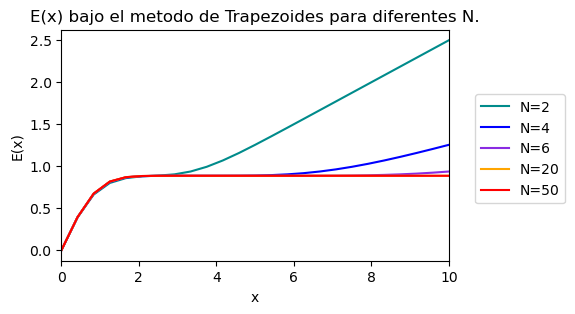

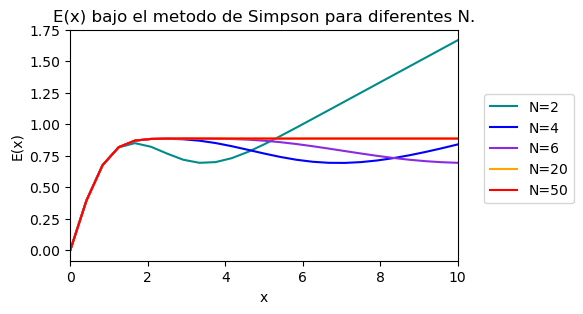

In [138]:
import matplotlib.pyplot as plt
import numpy as np

'''
Se comienza definiendo todo lo que se dio en la teoria:
    Integrando:
'''
def integrandoE(t):
    return np.exp(-t*t)

'''
    Regla de trapezoides:
        Se definen variables iniciales.
        Se usa un for para realizar la sumatoria.
        Se retorna todo evaluado de una vez.
'''
def trapezoides(inf,sup,N,func):
    sumatoria=0
    h=(sup-inf)/N
    for k in range(1,int(N)):
        sumatoria+=func(inf+k*h)
    return h*((1/2)*func(inf)+(1/2)*func(sup)+sumatoria)

'''
    Regla de Simpson:
        Es similar a la funcion anterior. 
        Lo que cambia ahora es que hay dos sumatorias distintas, una par y otra impar, 
        esto se distingue en el range.
'''
def simpson(inf,sup,N,func):
    sumImpar=0
    sumPar=0
    h=(sup-inf)/N
    for k in range(1,N,2):
        sumImpar+=func(inf+k*h)
    for k in range(2,N-1,2):
        sumPar+=func(inf+k*h)
    return (h/3)*(func(inf)+func(sup)+4*sumImpar+2*sumPar)

'''
Ahora, para los graficos:
    Se eligen los valores de x a graficar.
'''
eje=np.linspace(0.0,10.0, num=25)

'''
    Para el metodo de Trapezoides:
        Se calcula el E(x) para cada N, se utiliza directamente el arreglo 'eje' para 
        evitar un for loop (programacion vectorial).
'''
ETrap2=trapezoides(0,eje,2,integrandoE)
ETrap4=trapezoides(0,eje,4,integrandoE)
ETrap6=trapezoides(0,eje,6,integrandoE)
ETrap20=trapezoides(0,eje,20,integrandoE)
ETrap50=trapezoides(0,eje,50,integrandoE)

'''
        Se establece el tamano del grafico.
        Se grafica para cada N con un color diferente.
        Se agrega titulo, nombre de los ejes,leyenda para cada funcion, y se establece los limites del eje x.
        Se muestra el grafico final.
'''
plt.figure(figsize=(5,3))

plt.plot(eje, ETrap2, 'DarkCyan',linewidth=1.5)
plt.plot(eje, ETrap4 , 'Blue', linewidth=1.5)
plt.plot(eje, ETrap6 , 'BlueViolet', linewidth=1.5)
plt.plot(eje, ETrap20 , 'Orange', linewidth=1.5)
plt.plot(eje, ETrap50 ,'Red', linewidth=1.5)

plt.title("E(x) bajo el metodo de Trapezoides para diferentes N.")
plt.xlabel("x")
plt.ylabel("E(x)")
plt.legend(["N=2", "N=4", "N=6", "N=20", "N=50"], loc="upper left",bbox_to_anchor=(1.05, 0.75), ncol=1)
plt.xlim(0, 10)

plt.show()

'''
    Para el metodo de Simpson:
        El proceso es el mismo que en el caso anterior.
'''
ESimp2=simpson(0,eje,2,integrandoE)
ESimp4=simpson(0,eje,4,integrandoE)
ESimp6=simpson(0,eje,6,integrandoE)
ESimp20=simpson(0,eje,20,integrandoE)
ESimp50=simpson(0,eje,50,integrandoE)

plt.figure(figsize=(5,3))

plt.plot(eje, ESimp2, 'DarkCyan',linewidth=1.5)
plt.plot(eje, ESimp4 , 'Blue', linewidth=1.5)
plt.plot(eje, ESimp6 , 'BlueViolet', linewidth=1.5)
plt.plot(eje, ESimp20 , 'Orange', linewidth=1.5)
plt.plot(eje, ESimp50 ,'Red', linewidth=1.5)

plt.title("E(x) bajo el metodo de Simpson para diferentes N.")
plt.xlabel("x")
plt.ylabel("E(x)")
plt.legend(["N=2", "N=4", "N=6", "N=20", "N=50"], loc="upper left",bbox_to_anchor=(1.05, 0.75), ncol=1)
plt.xlim(0, 10)

plt.show()


2. Para el caso particular $x = 1$, asuma que $E(1) = 0.746824132812427025$. Estime el error relativo utilizando la ecuación
$$
{\rm{Error}}[E(x)]_{x=1} = \frac{|E_N(1) - E(1)|}{E(1)}
$$
donde $E_N(1)$ es el valor estimado utilizando ambos métodos numéricos. Realice un gráfico del error como función de $N$, llegando a un valor de $N$ hasta que el error sea del orden $10^{-10}$.

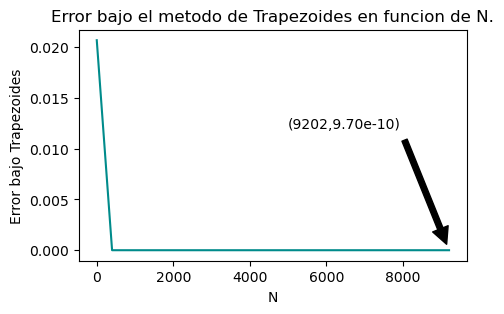

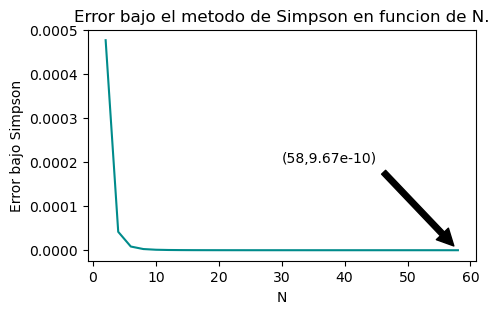

In [141]:
'''
Para el metodo de Trapezoides:
    Mas adelante busco alimentar a la funcion de 'tapezoides' con un array, esto es un problema porque adentro 
    de 'trapezoides', pido un range que estaria siendo alimentando con el array completo (representa un error). 
    Por esto debo usar numpy.vectorize(), que lo que hace es redefinir trapezoides para que tome un array como 
    input y me retorne otro array (por debajo es escencialmente un for loop).
'''
v_trapezoides=np.vectorize(trapezoides)

'''
    Aca se realiza un for con el objetivo de buscar el N para el que corresponde un error de orden 10e-10.
    El range comienza en 6002 por tres razones:
        6000 es multiplo de 400 (el espaciado entre los valores).
        El metodo de trapezoides no es el mas exacto, y por experimentacion con el codigo se que a N=6000 sigue
        estando lejos de dar el error buscado, entonces asi me ahorro valores a probar en el for (el for es lento, 
        y es aqui es donde mas tarda mi codigo).
        Se suma 2 a 6000 ya que para los metodos no es permitido N=0, ni tampoco quiero numeros impares para hacer 
        una comparativa clara entre ambos metodos (Simpson solo admite valores pares de N), entonces el array final 
        de N debe comenzar en 2.
    Dicho N se guarda en 'ene_max_trap'.
'''
for i in range(6002,100000,400):
    if np.absolute(v_trapezoides(0,1,i,integrandoE)-E1_Exacto)/E1_Exacto<1e-09:
        ene_max_trap=i
        break

'''
    Se crea un array con los N a usar, observe que llega hasta 'ene_max_trap' mas 400 (el espaciado entre los 
    valores) para que se grafique tambien el error de orden 10e-10.
    Es con los N a usar (un array) alimento a 'v_trapezoides' y calculo el error para este metodo.
'''
ene_a_usar_trap=np.arange(2,ene_max_trap+400,400,dtype=int)
errorCalc_trap=np.absolute(v_trapezoides(0,1,ene_a_usar_trap,integrandoE)-E1_Exacto)/E1_Exacto

'''
    Se establece el tamano del grafico.
    Se grafica los arrays recien creados.
    Se agrega titulo, nombre de los ejes, y una etiqueta para el ultimo valor (para mostrar el N al que se alcanza 
    el error deseado).
        Para evitar que el error en la etiqueta tenga muchos decimales, pero mantener la notacion cientifica (round 
        es inutil), se formatea el valor para que solo muestre dos decimales.
    Se muestra el grafico final.
'''
plt.figure(figsize=(5,3))

plt.plot(ene_a_usar_trap, errorCalc_trap, 'DarkCyan',linewidth=1.5)

plt.title("Error bajo el metodo de Trapezoides en funcion de N.")
plt.xlabel("N")
plt.ylabel("Error bajo Trapezoides")
plt.annotate('('+str(ene_a_usar_trap[-1])+','+str('{:0.2e}'.format(errorCalc_trap[-1]))+')',
             xy=(ene_a_usar_trap[-1],errorCalc_trap[-1]),xytext=(5000, 0.012),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

'''
Para el metodo de Simpson:
    Es similar al caso anterior. 
    Lo que cambia ahora es que el N para el que le corresponde un error de orden 10e-10 se comienza a buscar desde 
    N=2, y con un menor espaciado entre los valores, porque Simpson es mucho mas exacto.
'''
v_simpson=np.vectorize(simpson)

for i in range(2,100000,2):
    if np.absolute(v_simpson(0,1,i,integrandoE)-E1_Exacto)/E1_Exacto<1e-09:
        ene_max_simp=i
        break

ene_a_usar_simp=np.arange(2,ene_max_simp+2,2,dtype=int)
errorCalc_simp=np.absolute(v_simpson(0,1,ene_a_usar_simp,integrandoE)-E1_Exacto)/E1_Exacto

plt.figure(figsize=(5,3))

plt.plot(ene_a_usar_simp, errorCalc_simp, 'DarkCyan',linewidth=1.5)

plt.title("Error bajo el metodo de Simpson en funcion de N.")
plt.xlabel("N")
plt.ylabel("Error bajo Simpson")
plt.annotate('('+str(ene_a_usar_simp[-1])+','+str('{:0.2e}'.format(errorCalc_simp[-1]))+')',
             xy=(ene_a_usar_simp[-1],errorCalc_simp[-1]),xytext=(30, 0.0002),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
